In [1]:
import datetime
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"="*8 + "%s"%nowtime)

printbar()


========2024-05-31 15:12:44


In [2]:
import numpy as np
noesypr1d_20 = np.load(r'MTBLS242_463serum_noesypr1d.npy') 
cpmgpr1d_DL = np.load(r'MTBLS242_463serum_small.npy')
ledbp_DL = np.load(r'MTBLS242_463serum_large.npy')
noesypr1d_20.shape, cpmgpr1d_DL.shape, ledbp_DL.shape # 463

((463, 131072), (463, 131072), (463, 131072))

In [3]:
ppm_20 = np.linspace(14.7058, -5.3218, 128*1024)  # 4.702, 20.0276 
ppm_20.shape

(131072,)

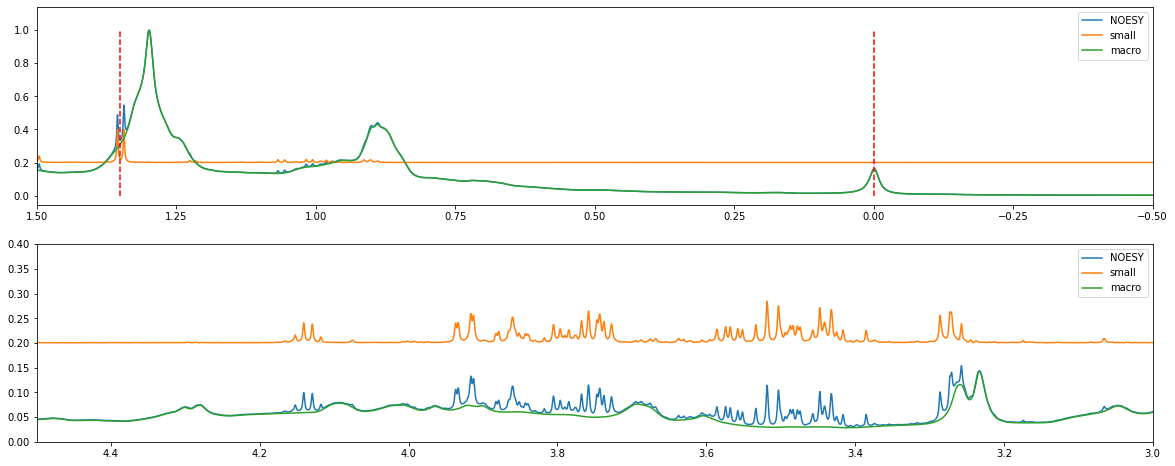

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
plt.plot(ppm_20, noesypr1d_20[0], label = 'NOESY')
plt.plot(ppm_20, cpmgpr1d_DL[0]+0.2, label = 'small')
plt.plot(ppm_20, ledbp_DL[0], label = 'macro')
plt.vlines(1.35, 0, 1, colors='r', linestyles='--')
plt.vlines(0, 0, 1, colors='r', linestyles='--')
plt.legend()
plt.xlim(1.5, -0.5)
plt.subplot(2,1,2)
plt.plot(ppm_20, noesypr1d_20[0], label = 'NOESY')
plt.plot(ppm_20, cpmgpr1d_DL[0]+0.2, label = 'small')
plt.plot(ppm_20, ledbp_DL[0], label = 'macro')
plt.legend()
plt.xlim(4.5, 3)
plt.ylim(-0.00, 0.4)
plt.show()

In [5]:
cpmgpr1d_nmr = np.load(r'MTBLS242_cpmgpr1d_463.npy')
ledbp_nmr = np.load(r'MTBLS242_ledbp_463.npy')
noesypr1d_20.shape, cpmgpr1d_nmr.shape, ledbp_nmr.shape  

((463, 131072), (463, 131072), (463, 65536))

In [6]:
ppm_led = np.linspace(4.701+30.0459/2, 4.701-30.0459/2, 64*1024)
for i in range(0, 128*1024):
    if ppm_led[i] < ppm_20.max():
        print('{:.3f} ppm, {} point'.format(ppm_20.max(), i) )
        left = i
        break  
for i in range(0, 128*1024):
    if ppm_led[i] < ppm_20.min():
        print('{:.3f} ppm, {} point'.format(ppm_20.min(), i) )
        right = i
        break  

14.706 ppm, 10946 point
-5.322 ppm, 54629 point


In [7]:
sw_led_old = np.linspace(0, right - left, right - left, endpoint=True) 
sw_led_new = np.linspace(0, right - left, 128*1024, endpoint=True) 
ledbp_nmr_20_list = []
for i in ledbp_nmr:
    led_data = np.interp(sw_led_new, sw_led_old, i[10946:54629 ])
    ledbp_nmr_20_list.append(led_data)
    
ledbp_nmr_20 = np.array(ledbp_nmr_20_list)   
ledbp_nmr_20.shape    

(463, 131072)

In [8]:
# normalization 
cpmgpr1d_nmr -= np.min( cpmgpr1d_nmr[:,80000: 95000], axis=1).reshape(-1, 1)
cpmgpr1d_nmr /= np.max( cpmgpr1d_nmr[:,80000:95000], axis=1).reshape(-1, 1)
ledbp_nmr_20 -= np.min(ledbp_nmr_20[:,80000: 95000], axis=1).reshape(-1, 1)
ledbp_nmr_20 /= np.max(ledbp_nmr_20[:,80000:95000], axis=1).reshape(-1, 1)

noesypr1d_20.shape, cpmgpr1d_DL.shape, ledbp_DL.shape

((463, 131072), (463, 131072), (463, 131072))

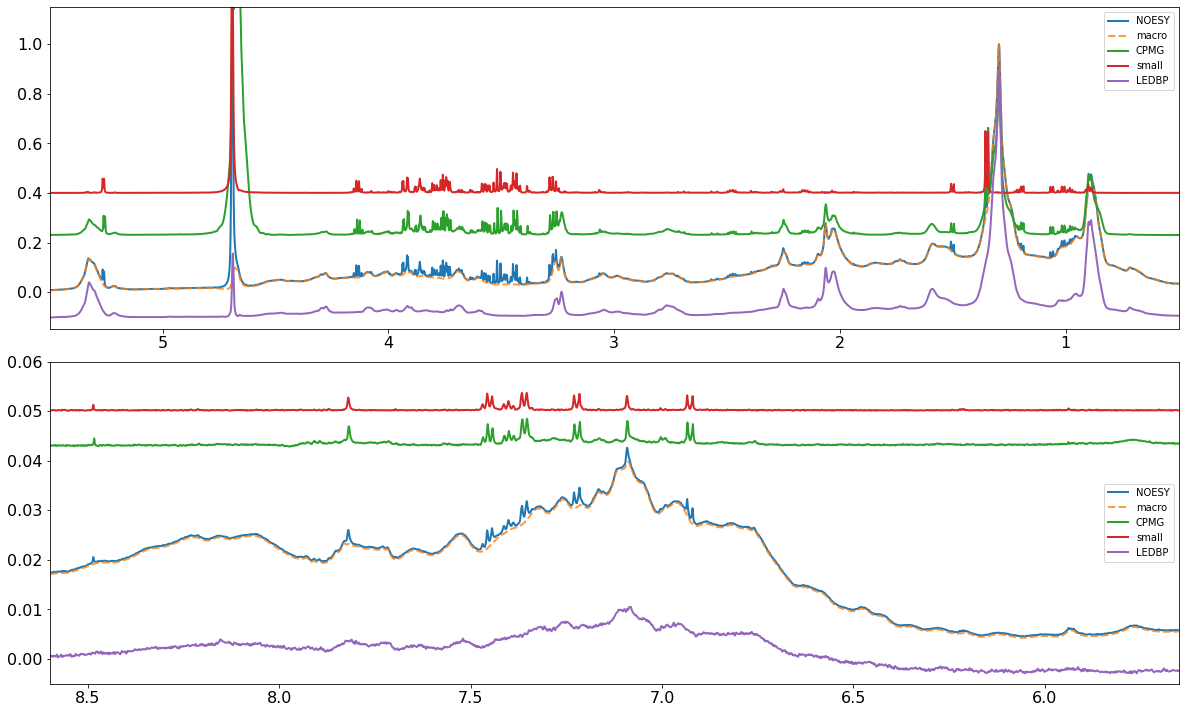

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.plot(ppm_20, noesypr1d_20[10], linewidth = 2 , label = 'NOESY')
plt.plot(ppm_20, ledbp_DL[10] , linestyle='--' , alpha = 0.8, linewidth = 2, label = 'macro')
plt.plot(ppm_20-0.005, cpmgpr1d_nmr[10]*0.6+0.23, linewidth = 2, label = 'CPMG')  
plt.plot(ppm_20, cpmgpr1d_DL[10]+0.4 , linewidth = 2, label = 'small')
plt.plot(ppm_20-0.013, ledbp_nmr_20[10]*1-0.1 , linewidth = 2, label = 'LEDBP')
plt.xlim(5.5, 0.5)
plt.ylim(-0.15,1.15) 
plt.legend()
plt.tick_params(labelsize=16)
plt.subplot(2,1,2)
plt.plot(ppm_20, noesypr1d_20[10] , linewidth = 2, label = 'NOESY')
plt.plot(ppm_20, ledbp_DL[10] , linestyle='--' , alpha = 0.8, linewidth = 2, label = 'macro')
plt.plot(ppm_20-0.000, cpmgpr1d_nmr[10]*0.6+0.043 , linewidth = 2 , label = 'CPMG')  
plt.plot(ppm_20, cpmgpr1d_DL[10]+0.05 , linewidth = 2, label = 'small')
plt.plot(ppm_20-0.013, ledbp_nmr_20[10]*1 , linewidth = 2, label = 'LEDBP')  
plt.xlim(8.6, 5.65 )
plt.ylim(-0.005, 0.06 ) 
plt.legend()
plt.subplots_adjust(top=0.99,bottom=0.05,left=0.01 ,right=0.99,hspace=0.1,wspace=0.2)
plt.tick_params(labelsize=16)
plt.show()  

In [10]:
# normalization 
noesypr1d_20 -= np.min(noesypr1d_20[:,80000: 95000], axis=1).reshape(-1, 1)
noesypr1d_20 /= np.max(noesypr1d_20[:,80000: 95000], axis=1).reshape(-1, 1)
cpmgpr1d_DL -= np.min(cpmgpr1d_DL[:,80000: 95000], axis=1).reshape(-1, 1)
cpmgpr1d_DL /= np.max(cpmgpr1d_DL[:,80000: 95000], axis=1).reshape(-1, 1)
ledbp_DL -= np.min(ledbp_DL[:,80000: 95000], axis=1).reshape(-1, 1)
ledbp_DL /= np.max(ledbp_DL[:,80000: 95000], axis=1).reshape(-1, 1)

In [11]:
for i in range(0, 128*1024):
    if ppm_20[i] < 5.17:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i))
        break   
for i in range(0, 128*1024):
    if ppm_20[i] < 4.50:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i))
        break  
for i in range(0, 128*1024):
    if ppm_20[i] < 10:
        print('{:.2f} ppm, {} point'.format(ppm_20[i], i))
        break   
for i in range(0, 128*1024):
    if ppm_20[i] < 0.2:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i))
        break      

5.170 ppm, 62408 point
4.500 ppm, 66793 point
10.00 ppm, 30798 point
0.200 ppm, 94934 point


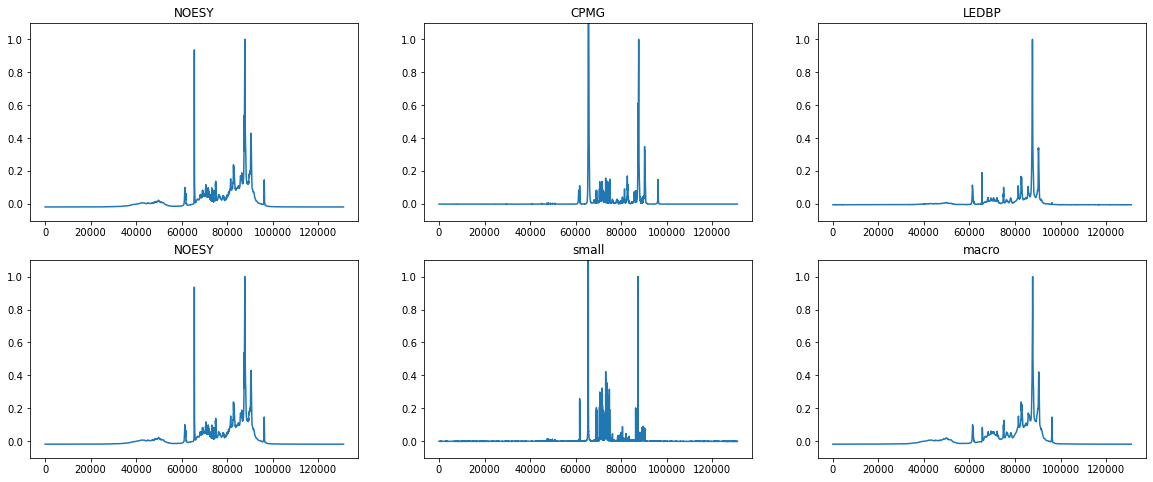

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
plt.plot(noesypr1d_20[0])
plt.ylim(-0.1,1.1)
plt.title('NOESY')
plt.subplot(2,3,2)
plt.plot(cpmgpr1d_nmr[0])
plt.ylim(-0.1,1.1)
plt.title('CPMG')
plt.subplot(2,3,3)
plt.plot(ledbp_nmr_20[0])
plt.ylim(-0.1,1.1)
plt.title('LEDBP')
plt.subplot(2,3,4)
plt.plot(noesypr1d_20[0])
plt.title('NOESY')
plt.ylim(-0.1,1.1)
plt.subplot(2,3,5)
plt.plot(cpmgpr1d_DL[0])
plt.title('small')
plt.ylim(-0.1,1.1)
plt.subplot(2,3,6)
plt.plot(ledbp_DL[0])
plt.title('macro')
plt.ylim(-0.1,1.1)
plt.show()   

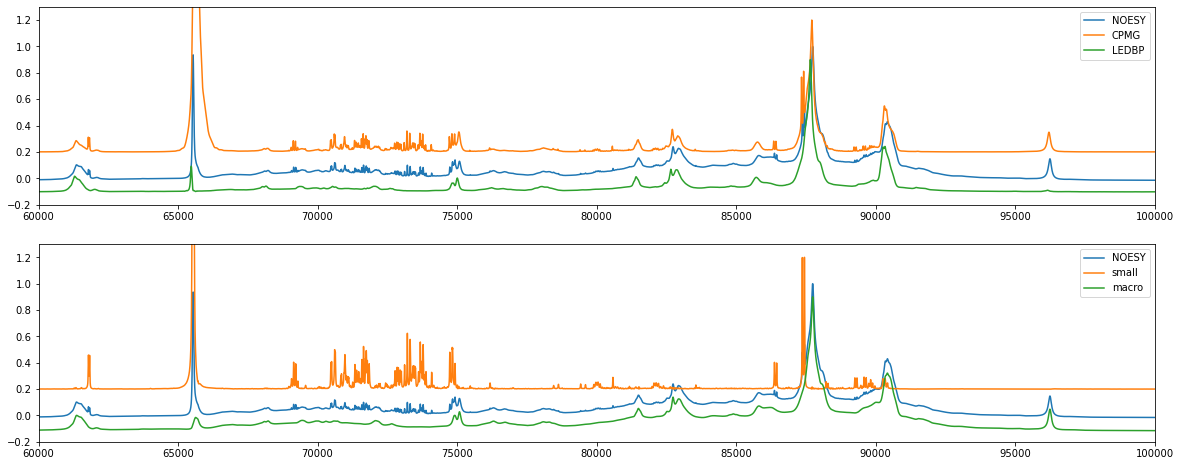

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
plt.plot(noesypr1d_20[0], label = 'NOESY')
plt.plot(cpmgpr1d_nmr[0]+0.2, label = 'CPMG')
plt.plot(ledbp_nmr_20[0]-0.1, label = 'LEDBP')
plt.legend()
plt.xlim(60000,100000)
plt.ylim(-0.2, 1.3)
plt.subplot(2,1,2)
plt.plot(noesypr1d_20[0], label = 'NOESY')
plt.plot(cpmgpr1d_DL[0]+0.2, label = 'small')
plt.plot(ledbp_DL[0]-0.1, label = 'macro')
plt.legend()
plt.xlim(60000,100000)
plt.ylim(-0.2, 1.3)
plt.show()   

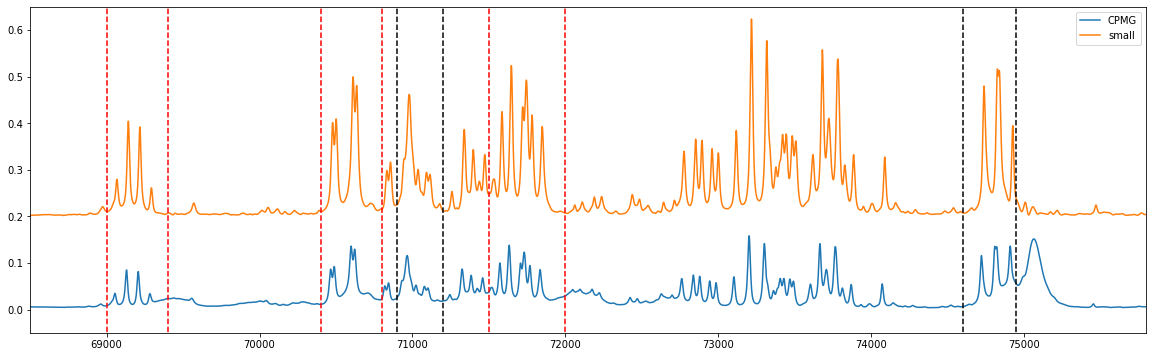

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmgpr1d_nmr[0], label = 'CPMG')
plt.plot(cpmgpr1d_DL[0] + 0.2,label = 'small')
plt.vlines(69000, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(69400, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(70400, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(70800, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(70900, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(71200, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(71500, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(72000, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(74600, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(74950, -0.1,1.1, colors='k',linestyles='--')
plt.ylim(-0.05, 0.65)
plt.xlim(68500, 75800)
plt.legend()
plt.show()

In [15]:
# cpmg_DL, cpmg_nmr   
cpmg_DL_1 = (cpmgpr1d_DL[:, 69000: 69400]-cpmgpr1d_DL[:, 69000: 69400].min(1).reshape(-1,1)).max(1) 
cpmg_nmr_1 = (cpmgpr1d_nmr[:, 69000: 69400]-cpmgpr1d_nmr[:, 69000: 69400].min(1).reshape(-1,1)).max(1)
facter = cpmg_DL_1/cpmg_nmr_1    # lactate
cpmg_DL_1.shape, cpmg_nmr_1.shape

((463,), (463,))

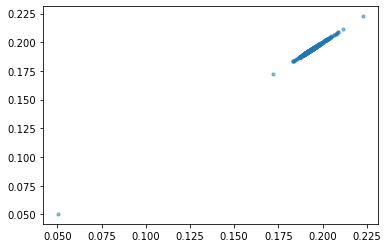

In [16]:
x = [0, 1]
y = [0, 1]
plt.scatter(cpmg_DL_1, cpmg_nmr_1*facter, s=10, alpha=0.5)
plt.show()

In [17]:
# cpmg_DL, cpmg_nmr    
cpmg_DL_1_2 = (cpmgpr1d_DL[:,70400:70800]-cpmgpr1d_DL[:,70400:70800].min(1).reshape(-1,1)).max(1) 
cpmg_nmr_1_2 = (cpmgpr1d_nmr[:,70400:70800]-cpmgpr1d_nmr[:,70400:70800].min(1).reshape(-1,1)).max(1)  
cpmg_DL_1_2.shape, cpmg_nmr_1_2.shape

((463,), (463,))

R2：0.992


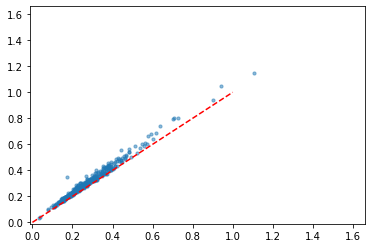

In [18]:
correlation_coefficient_before = np.corrcoef(cpmg_DL_1_2, cpmg_nmr_1_2)[0, 1]
correlation_coefficient = np.corrcoef(cpmg_DL_1_2, cpmg_nmr_1_2*facter)[0, 1]
print("R2：{:.3f}".format(correlation_coefficient))
plt.scatter(cpmg_DL_1_2, cpmg_nmr_1_2*facter, s=10, alpha=0.5)
plt.plot(x,y ,c = 'r', linestyle = '--')
plt.xlim(-1*cpmg_DL_1_2.max()*0.01, cpmg_DL_1_2.max()*1.5)
plt.ylim(-1*cpmg_DL_1_2.max()*0.01, cpmg_DL_1_2.max()*1.5)
plt.show()

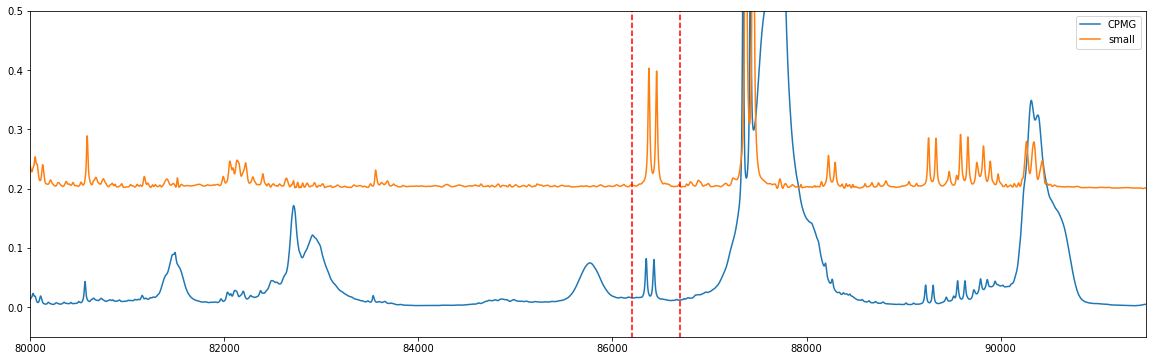

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmgpr1d_nmr[0],label = 'CPMG')
plt.plot(cpmgpr1d_DL[0] +0.2,label = 'small' )
plt.vlines(86200, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(86700, -0.1,1.1, colors='r',linestyles='--')
plt.ylim(-0.05, 0.5)
plt.xlim(80000, 91500)
plt.legend()
plt.show()

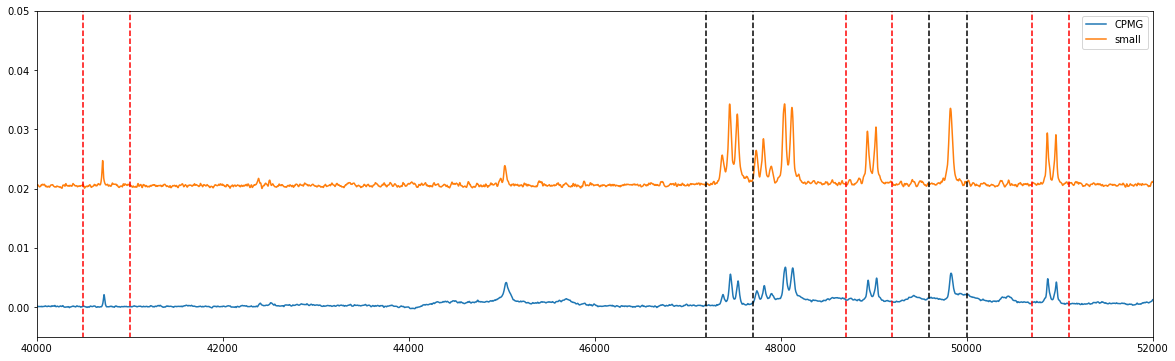

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmgpr1d_nmr[0], label = 'CPMG')
plt.plot(cpmgpr1d_DL[0] + 0.02, label = 'small' )
plt.vlines(40500, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(41000, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(47200, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(47700, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(48700, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(49200, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(49600, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(50000, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(50700, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(51100, -0.1,1.1, colors='r', linestyles='--')
plt.ylim(-0.005, 0.05)
plt.xlim(40000, 52000)
plt.legend()
plt.show()

In [21]:
def process_slice(data, start, end):
    if not data.size:
        raise ValueError("Input data is empty")
    slice_data = data[:, start:end]
    min_values = slice_data.min(1).reshape(-1, 1)
    return (slice_data - min_values).max(1)
slices = [(70400, 70800),(70900, 71200),(71500, 72000), (74600, 74950),(86200, 86700),
    (40500, 41000), (47200, 47700), (48700, 49200), (49600, 50000), (50700, 51100)]

cpmg_DL_peak = []
cpmg_nmr_peak = []
for start, end in slices:
    try:
        cpmg_DL_part = process_slice(cpmgpr1d_DL, start, end)
        cpmg_nmr_part = process_slice(cpmgpr1d_nmr, start, end)
    except ValueError as e:
        print(f"Errors encountered while processing data：{e}")
        continue  
    cpmg_DL_peak.append(cpmg_DL_part)
    cpmg_nmr_peak.append(cpmg_nmr_part)

In [22]:
for i, j in zip(cpmg_DL_peak, cpmg_nmr_peak):
    m, b = np.polyfit(i, j*facter, 1)
    print("Linear equation: y = {:.2f}*x + {:.2f}".format(m, b))

Linear equation: y = 1.07*x + 0.01
Linear equation: y = 0.99*x + 0.01
Linear equation: y = 0.95*x + -0.00
Linear equation: y = 1.03*x + 0.00
Linear equation: y = 0.89*x + 0.00
Linear equation: y = 1.06*x + 0.00
Linear equation: y = 0.98*x + 0.00
Linear equation: y = 0.98*x + 0.00
Linear equation: y = 0.91*x + 0.00
Linear equation: y = 1.09*x + 0.00


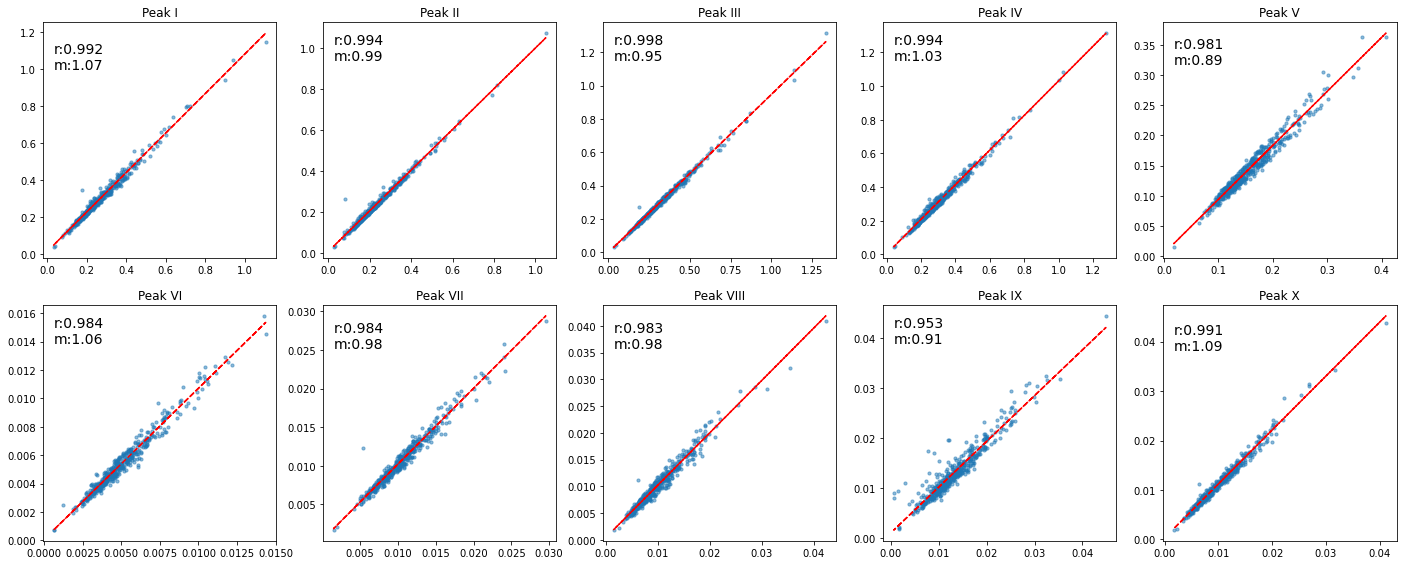

In [23]:
peak_list = ['I','II','III','IV','V','VI','VII','VIII','IX','X']
plt.figure(figsize=(20, 8))
for n, (i, j, p) in enumerate(zip(cpmg_DL_peak, cpmg_nmr_peak, peak_list), 1):
    m, b = np.polyfit(i, j*facter, 1)
    plt.subplot(2,5,n)
    plt.scatter(i, j*facter, s=10, alpha=0.5)
    plt.plot(i, m*i+b ,c = 'r', linestyle = '--')
    plt.title('Peak ' + p)
    plt.text(min(i), max(j*facter), 'r:{:.3f}\nm:{:.2f}'.format(np.corrcoef(i, j*facter)[0, 1], m), fontsize=14, ha='left', va='top')
plt.subplots_adjust(top=0.95,bottom=0.05,left=0.04 ,right=0.98,hspace=0.2 ,wspace=0.2)
plt.show()

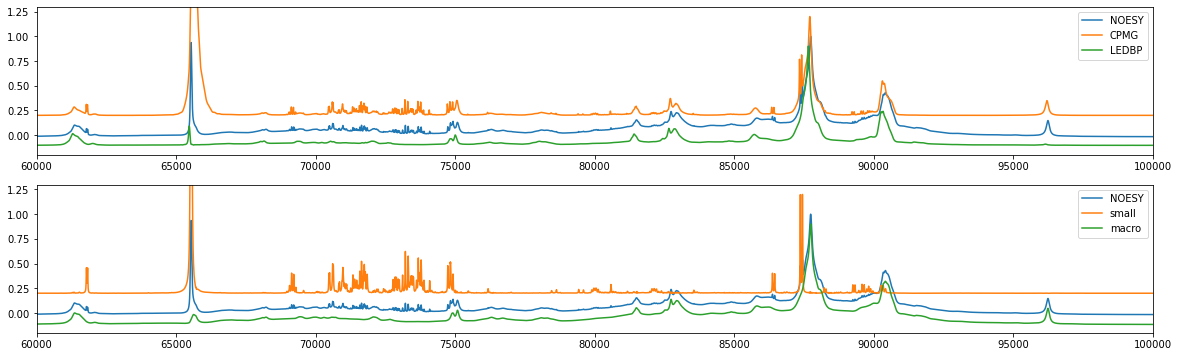

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.subplot(2,1,1)
plt.plot(noesypr1d_20[0], label = 'NOESY')
plt.plot(cpmgpr1d_nmr[0]+0.2, label = 'CPMG')
plt.plot(ledbp_nmr_20[0]-0.1, label = 'LEDBP')
plt.legend()
plt.xlim(60000,100000)
plt.ylim(-0.2, 1.3)
plt.subplot(2,1,2)
plt.plot(noesypr1d_20[0], label = 'NOESY')
plt.plot(cpmgpr1d_DL[0]+0.2, label = 'small')
plt.plot(ledbp_DL[0]-0.1, label = 'macro')
plt.legend()
plt.xlim(60000,100000)
plt.ylim(-0.2, 1.3)
plt.show()   

In [25]:
for i in range(0, 128*1024):
    if ppm_20[i] < 5.17:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break   
for i in range(0, 128*1024):
    if ppm_20[i] < 4.50:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break  
for i in range(0, 128*1024):
    if ppm_20[i] < 10:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break   
for i in range(0, 128*1024):
    if ppm_20[i] < 0.2:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break   

5.170 ppm, 62408 point
4.500 ppm, 66793 point
10.000 ppm, 30798 point
0.200 ppm, 94934 point


In [26]:
# δ5.17 − 4.5 were removed       # 10-0.2 ppm 
noesypr1d_20[:, 62408:66793] = 0
cpmgpr1d_DL[:, 62408:66793] = 0
ledbp_DL[:, 62408:66793] = 0

cpmgpr1d_nmr[:, 62408:66793] = 0
ledbp_nmr_20[:, 62408:66793] = 0

noesypr1d_20_clean = noesypr1d_20[:,30798:94934]
cpmgpr1d_DL_clean = cpmgpr1d_DL[:,30798:94934]
ledbp_DL_clean = ledbp_DL[:,30798:94934]

cpmgpr1d_nmr_clean = cpmgpr1d_nmr[:,30798:94934]
ledbp_nmr_clean = ledbp_nmr_20[:,30798:94934]

noesypr1d_20_clean.shape, cpmgpr1d_DL_clean.shape, ledbp_DL_clean.shape   

((463, 64136), (463, 64136), (463, 64136))

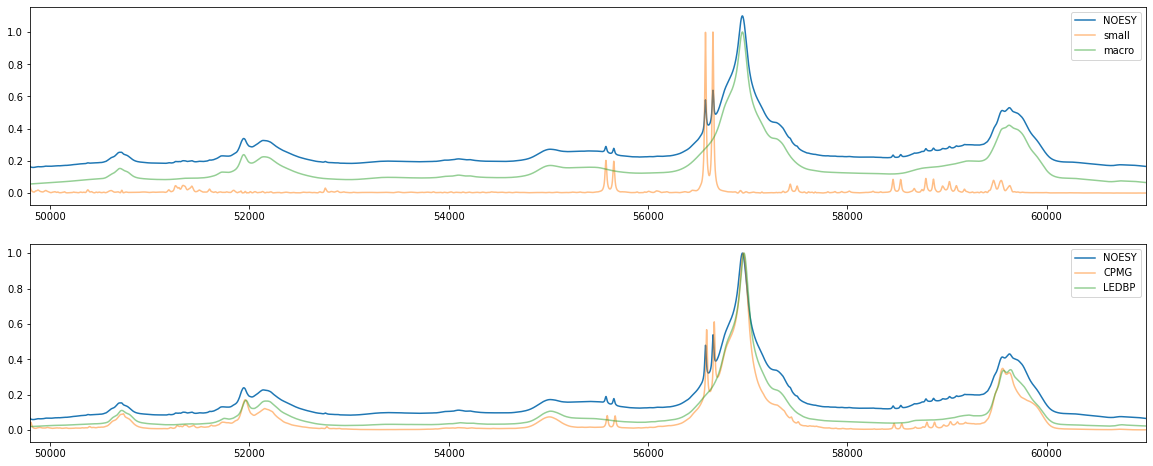

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
plt.plot(noesypr1d_20_clean[0]+0.1,label = 'NOESY')
plt.plot(cpmgpr1d_DL_clean[0], alpha = 0.5 ,label = 'small')
plt.plot(ledbp_DL_clean[0], alpha = 0.5 ,label = 'macro')
plt.legend()
plt.xlim(49800,61000)
plt.subplot(2,1,2)
plt.plot(np.linspace(0,64136,64136), noesypr1d_20_clean[0], label = 'NOESY')
plt.plot(np.linspace(0,64136,64136)+40,cpmgpr1d_nmr_clean[0], alpha = 0.5 ,label = 'CPMG')
plt.plot(np.linspace(0,64136,64136)+100,ledbp_nmr_clean[0], alpha = 0.5 ,label = 'LEDBP')
plt.legend()
plt.xlim(49800,61000)
plt.show()

In [28]:
# noesypr1d_20_clean, cpmgpr1d_DL_clean, ledbp_DL_clean,
# noesypr1d_20_clean, cpmgpr1d_nmr_clean, ledbp_nmr_clean,

In [29]:
def bin(data_for_bin, box = 20):
    '''bin function'''
    out_bin = []
    i = 0
    while data_for_bin.shape[1] > box*i:
        out_bin.append(np.sum(data_for_bin[:,i*box:(i+1)*box], 1)/data_for_bin[:,i*box:(i+1)*box].shape[1]) 
        i += 1
    return np.array(out_bin).T
def norn_total(x):
    '''norm function'''
    return x/np.sum(x, 1).reshape(-1,1)
def center(x):
    '''center function'''
    return x - np.mean(x, 0)

In [30]:
noesypr_bin_norm_center = center(norn_total(bin(noesypr1d_20_clean, box = 20)))
cpmgpr_DL_bin_norm_center = center(norn_total(bin(cpmgpr1d_DL_clean, box = 20)))
ledbp_DL_bin_norm_center = center(norn_total(bin(ledbp_DL_clean, box = 20)))

cpmgpr_nmr_bin_norm_center = center(norn_total(bin(cpmgpr1d_nmr_clean, box = 20)))
ledbp_nmr_bin_norm_center = center(norn_total(bin(ledbp_nmr_clean, box = 20)))

In [31]:
from sklearn.decomposition import PCA
X_all = cpmgpr_DL_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.72   0.1179 0.0452] 0.883


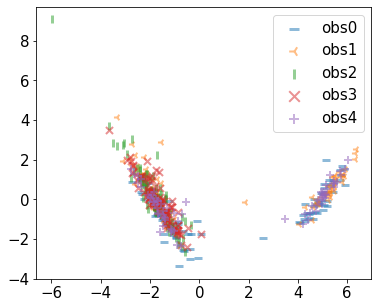

In [32]:
plt.figure(figsize=(6, 5))
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=50,marker='_',alpha= 0.5,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 50,marker='3',alpha= 0.5 ,linewidths = 2)
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=50,marker='|',alpha= 0.5,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=50,marker='x',alpha= 0.5,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=50,marker='+',alpha= 0.5 ,linewidths = 2 )  
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=15)

plt.show()

In [33]:
obs0_num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]   
obs1_num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106] 
obs2_num_list = [1, 2, 3, 4, 5, 6, None, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102] 
obs3_num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103] 
obs4_num_list = [3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 18, 20, 21, 24, 25, 27, 29, 31, 33, 35, 37, 39, 40, 41, 43, 44, 45, 46, 49, 51, 52, 54, 56, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102]
 
len(obs0_num_list), len(obs1_num_list), len(obs2_num_list), len(obs3_num_list), len(obs4_num_list)

(105, 97, 98, 92, 71)

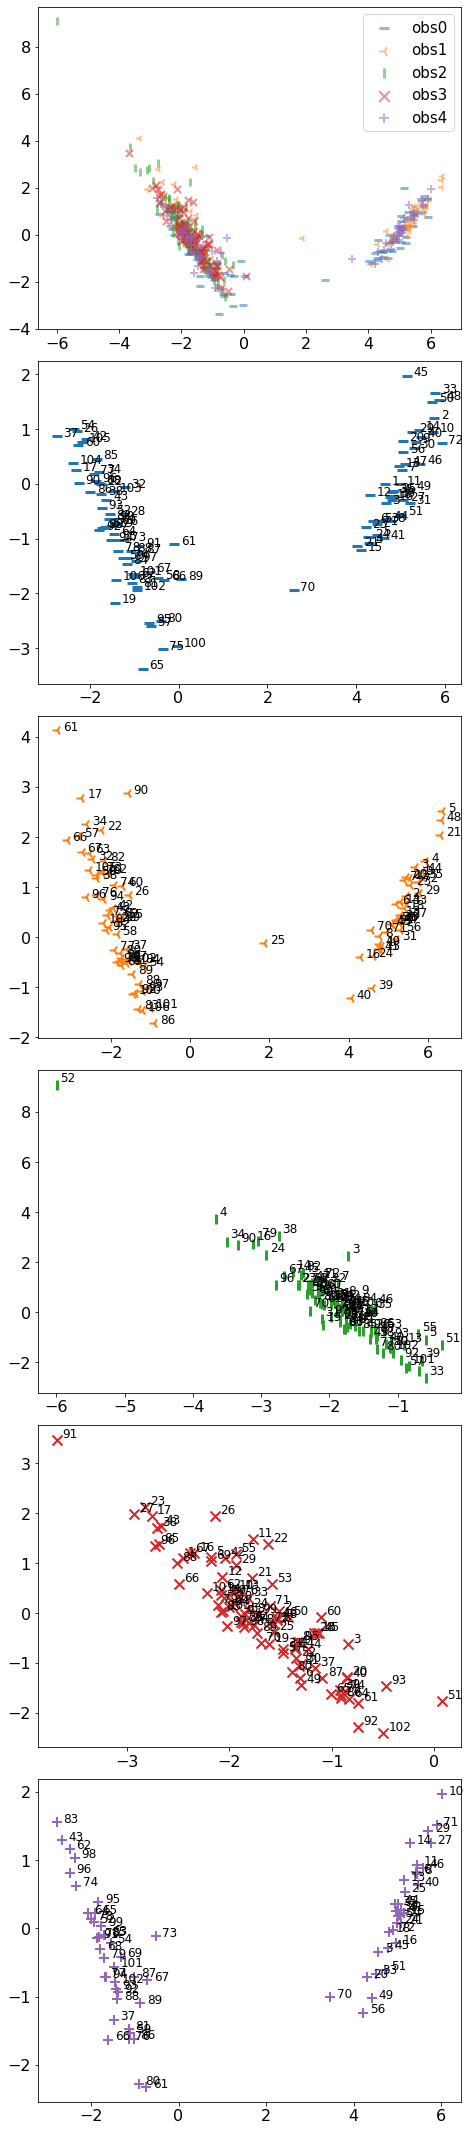

In [34]:
plt.figure(figsize=(7, 30))
plt.subplot(6,1,1)
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=50,marker='_',alpha= 0.5,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 50,marker='3',alpha= 0.5 ,linewidths = 2)
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=50,marker='|',alpha= 0.5,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=50,marker='x',alpha= 0.5,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=50,marker='+',alpha= 0.5 ,linewidths = 2 ) 
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.subplot(6,1,2)
n = obs0_num_list 
plt.scatter(pca.transform(X_all)[:105,0], pca.transform(X_all)[:105,1],c='#1f77b4',s=100,marker='_',linewidths = 3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:105,0][i]+0.15,pca.transform(X_all)[:105,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,3)
n = obs1_num_list 
plt.scatter(pca.transform(X_all)[105:202,0], pca.transform(X_all)[105:202,1],c='#ff7f0e', s=100,marker='3',linewidths = 2)
for i,txt in enumerate(n ):
    plt.annotate(txt,(pca.transform(X_all)[105:202,0][i]+0.15,pca.transform(X_all)[105:202,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,4)
n = obs2_num_list 
plt.scatter(pca.transform(X_all)[202:300,0], pca.transform(X_all)[202:300,1],c='#2ca02c',s=100,marker='|',linewidths = 3)
for i,txt in enumerate(n ):
    plt.annotate(txt,(pca.transform(X_all)[202:300,0][i ]+0.05,pca.transform(X_all)[202:300,1][i ]+0.15),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,5)
n = obs3_num_list 
plt.scatter(pca.transform(X_all)[300:392,0], pca.transform(X_all)[300:392,1],c='#d62728',s=100,marker='x',linewidths = 2)
for i,txt in enumerate(n ):
    plt.annotate(txt,(pca.transform(X_all)[300:392,0][i ]+0.05,pca.transform(X_all)[300:392,1][i ]+0.05),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,6)
n = obs4_num_list 
plt.scatter(pca.transform(X_all)[392: ,0], pca.transform(X_all)[392: ,1],c='#9467bd', s=100,marker='+',linewidths = 2)
for i,txt in enumerate(n ):
    plt.annotate(txt,(pca.transform(X_all)[392:,0][i ]+0.15,pca.transform(X_all)[392:,1][i ]),fontsize=12 ) 
plt.tick_params(labelsize=16)
plt.subplots_adjust(top=0.99,bottom=0.02,left=0.15 ,right=0.99,hspace=0.1 ,wspace=0.15)
plt.show()   

In [35]:
from sklearn.decomposition import PCA
X_all = noesypr_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.6446 0.1479 0.074 ] 0.8664


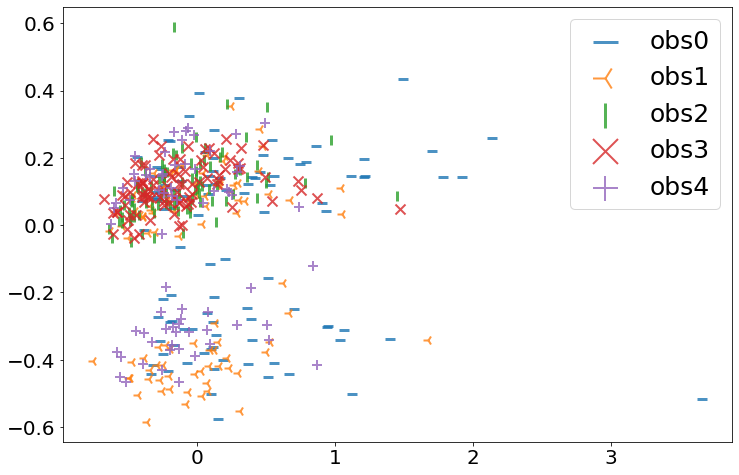

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8,linewidths = 2 ) 
plt.legend(fontsize=25, markerscale=2.5, scatterpoints=1)
plt.tick_params(labelsize=20)
plt.show()

In [37]:
from sklearn.decomposition import PCA
X_all = ledbp_DL_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.7835 0.1076 0.0374] 0.9285


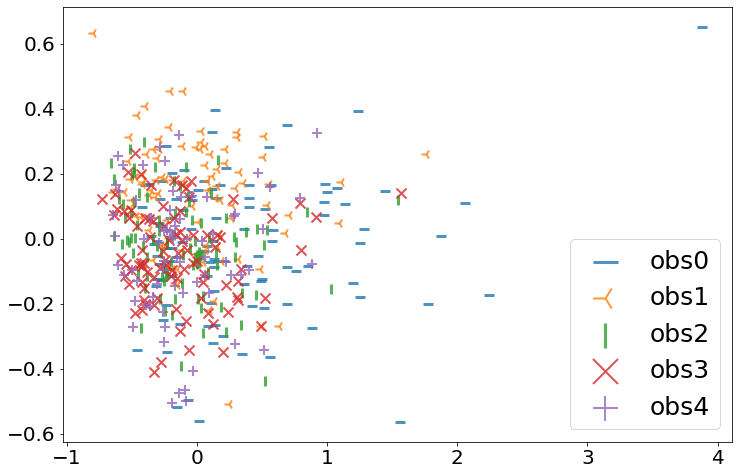

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8, linewidths = 2 ) 
plt.legend(fontsize=25, markerscale=2.5, scatterpoints=1)
plt.tick_params(labelsize=20)
plt.show()

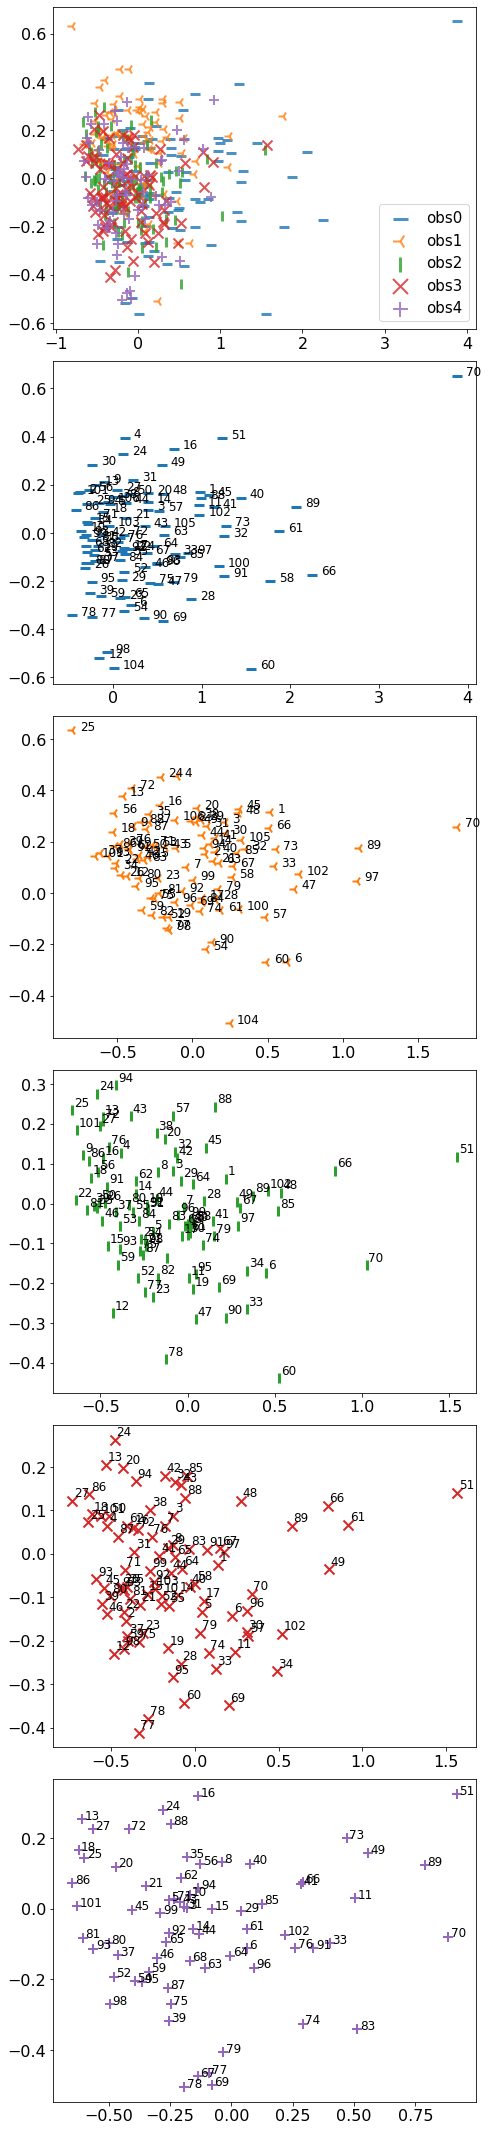

In [39]:
plt.figure(figsize=(7, 30))
plt.subplot(6,1,1)
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8, linewidths = 2 ) 
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.subplot(6,1,2)
n = obs0_num_list 
plt.scatter(pca.transform(X_all)[:105,0], pca.transform(X_all)[:105,1],c='#1f77b4',s=100,marker='_',linewidths=3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:105,0][i]+0.1 ,pca.transform(X_all)[:105,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,3)
n = obs1_num_list 
plt.scatter(pca.transform(X_all)[105:202,0], pca.transform(X_all)[105:202,1],c='#ff7f0e', s=100,marker='3',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[105:202,0][i]+0.05,pca.transform(X_all)[105:202,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,4)
n = obs2_num_list 
plt.scatter(pca.transform(X_all)[202:300,0], pca.transform(X_all)[202:300,1],c='#2ca02c',s=100,marker='|',linewidths = 3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[202:300,0][i]+0.01,pca.transform(X_all)[202:300,1][i]+0.01),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,5)
n = obs3_num_list 
plt.scatter(pca.transform(X_all)[300:392,0], pca.transform(X_all)[300:392,1],c='#d62728',s=100,marker='x',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[300:392,0][i]+0.01,pca.transform(X_all)[300:392,1][i]+0.01),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,6)
n = obs4_num_list 
plt.scatter(pca.transform(X_all)[392: ,0], pca.transform(X_all)[392: ,1],c='#9467bd', s=100,marker='+',linewidths  = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[392:,0][i]+0.01 ,pca.transform(X_all)[392:,1][i]),fontsize=12 ) 
plt.tick_params(labelsize=16)
plt.subplots_adjust(top=0.99,bottom=0.02,left=0.15 ,right=0.99,hspace=0.1 ,wspace=0.15)
plt.show()   

In [40]:
from sklearn.decomposition import PCA
X_all = cpmgpr_nmr_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.4337 0.3148 0.0681] 0.8166


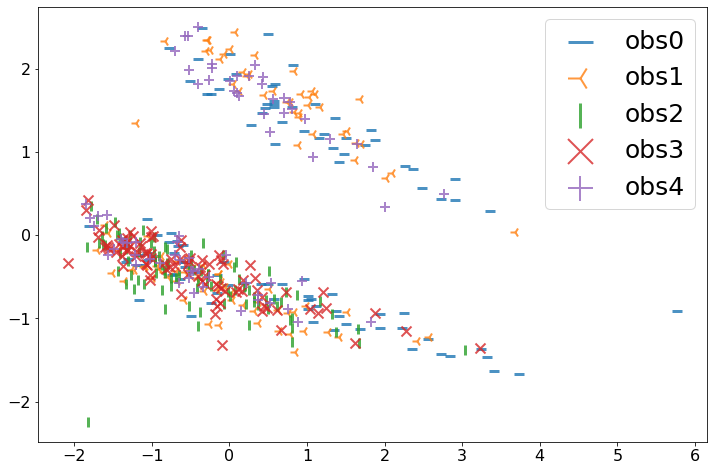

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths  = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths  = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths  = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths  = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8 ,linewidths  = 2) 
plt.legend(fontsize=25, markerscale=2.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.show()

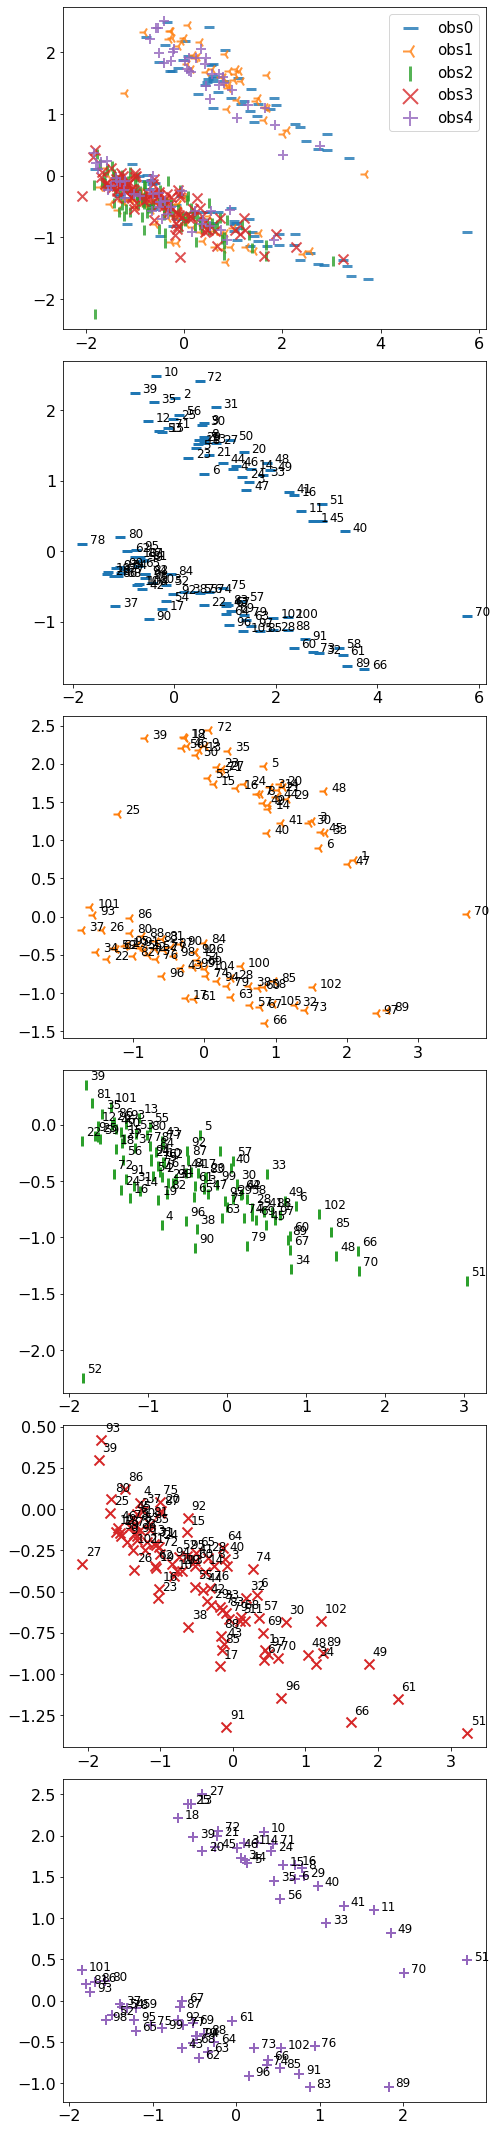

In [42]:
plt.figure(figsize=(7, 30))
plt.subplot(6,1,1)
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8 ,linewidths = 2) 
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.subplot(6,1,2)
n = obs0_num_list 
plt.scatter(pca.transform(X_all)[:105,0], pca.transform(X_all)[:105,1],c='#1f77b4',s=100,marker='_',linewidths=3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:105,0][i]+0.15,pca.transform(X_all)[:105,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,3)
n = obs1_num_list 
plt.scatter(pca.transform(X_all)[105:202,0], pca.transform(X_all)[105:202,1],c='#ff7f0e', s=100,marker='3',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[105:202,0][i]+0.1 ,pca.transform(X_all)[105:202,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,4)
n = obs2_num_list 
plt.scatter(pca.transform(X_all)[202:300,0], pca.transform(X_all)[202:300,1],c='#2ca02c',s=100,marker='|',linewidths = 3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[202:300,0][i]+0.05,pca.transform(X_all)[202:300,1][i]+0.05),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,5)
n = obs3_num_list 
plt.scatter(pca.transform(X_all)[300:392,0], pca.transform(X_all)[300:392,1],c='#d62728',s=100,marker='x',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[300:392,0][i]+0.05,pca.transform(X_all)[300:392,1][i]+0.05),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,6)
n = obs4_num_list 
plt.scatter(pca.transform(X_all)[392: ,0], pca.transform(X_all)[392: ,1],c='#9467bd', s=100,marker='+',linewidths  = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[392:,0][i]+0.08 ,pca.transform(X_all)[392:,1][i]),fontsize=12 ) #xytext
plt.tick_params(labelsize=16)
plt.subplots_adjust(top=0.99,bottom=0.02,left=0.15 ,right=0.99,hspace=0.1 ,wspace=0.15)
plt.show()   

In [43]:
from sklearn.decomposition import PCA
X_all = ledbp_nmr_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.8045 0.0895 0.0406] 0.9346


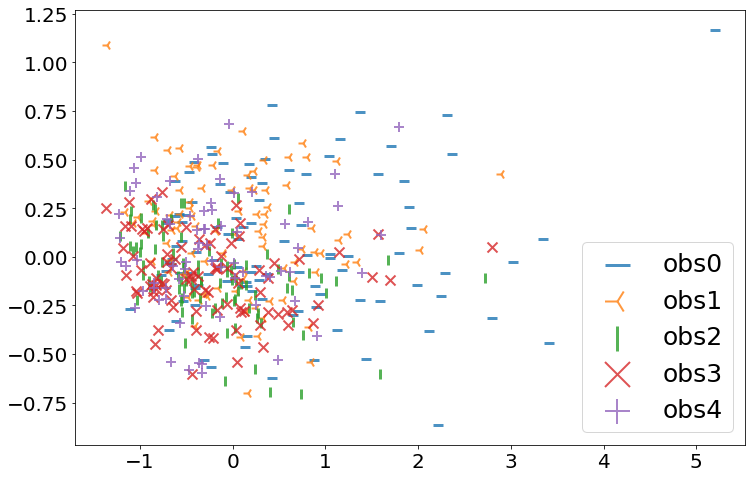

In [44]:
plt.figure(figsize=(12, 8))
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths  = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths  = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8 ,linewidths  = 3)
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths  = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8 ,linewidths  = 2) 
plt.legend(fontsize=25, markerscale=2.5, scatterpoints=1)
plt.tick_params(labelsize=20)
plt.show()

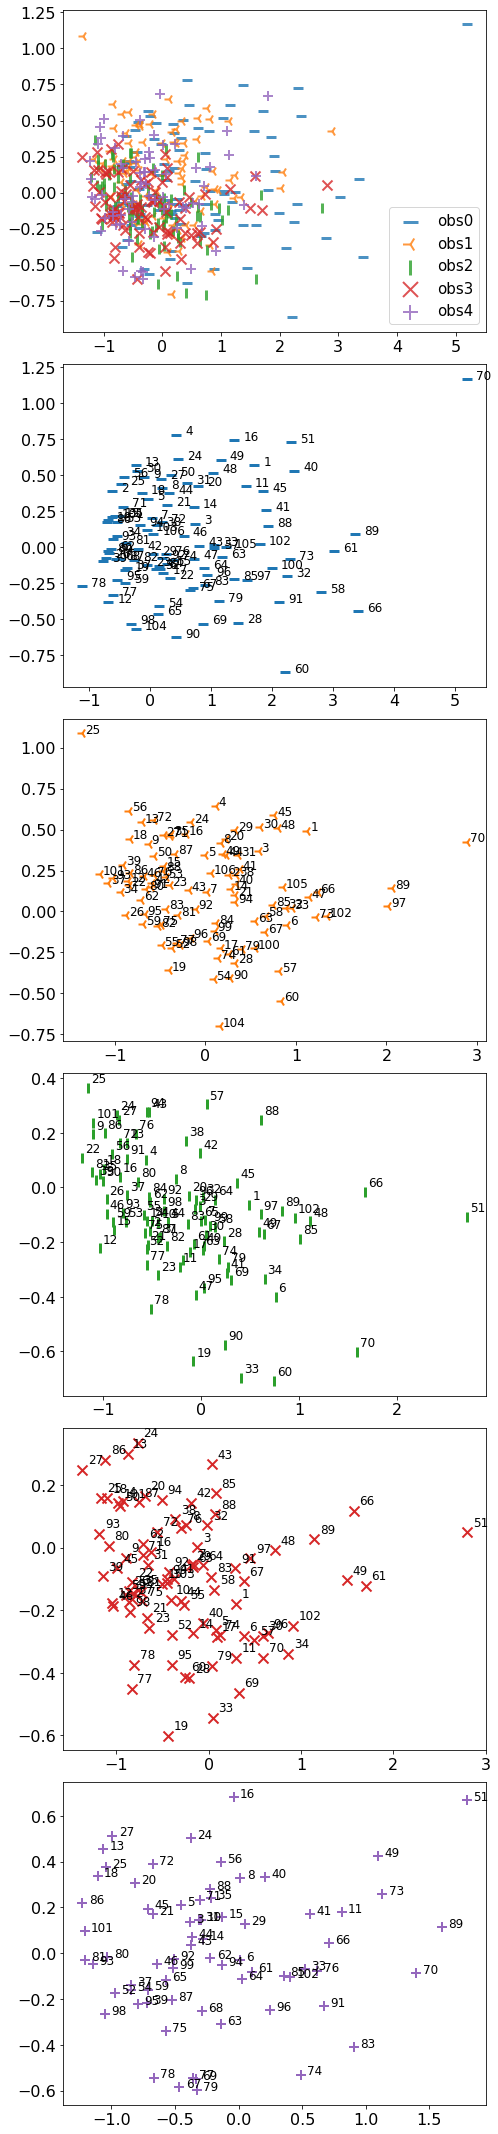

In [45]:
plt.figure(figsize=(7, 30))
plt.subplot(6,1,1)
plt.scatter(pca.transform(X_all)[:105,0],pca.transform(X_all)[:105,1],label='obs0',s=100,marker='_',alpha= 0.8,linewidths = 3)
plt.scatter(pca.transform(X_all)[105:202,0],pca.transform(X_all)[105:202,1],label='obs1',s= 100,marker='3',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[202:300,0],pca.transform(X_all)[202:300,1],label='obs2',s=100,marker='|',alpha= 0.8,linewidths = 3 )
plt.scatter(pca.transform(X_all)[300:392,0],pca.transform(X_all)[300:392,1],label='obs3',s=100,marker='x',alpha= 0.8,linewidths = 2 )
plt.scatter(pca.transform(X_all)[392:,0],pca.transform(X_all)[392:,1],label='obs4',s=100,marker='+',alpha= 0.8 ,linewidths = 2) 
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.subplot(6,1,2)
n = obs0_num_list  
plt.scatter(pca.transform(X_all)[:105,0], pca.transform(X_all)[:105,1],c='#1f77b4',s=100,marker='_',linewidths=3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:105,0][i]+0.15,pca.transform(X_all)[:105,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,3)
n = obs1_num_list  
plt.scatter(pca.transform(X_all)[105:202,0], pca.transform(X_all)[105:202,1],c='#ff7f0e', s=100,marker='3',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[105:202,0][i]+0.03,pca.transform(X_all)[105:202,1][i]),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,4)
n = obs2_num_list  
plt.scatter(pca.transform(X_all)[202:300,0], pca.transform(X_all)[202:300,1],c='#2ca02c',s=100,marker='|',linewidths = 3)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[202:300,0][i]+0.03,pca.transform(X_all)[202:300,1][i]+0.02),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,5)
n = obs3_num_list  
plt.scatter(pca.transform(X_all)[300:392,0], pca.transform(X_all)[300:392,1],c='#d62728',s=100,marker='x',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[300:392,0][i]+0.06,pca.transform(X_all)[300:392,1][i]+0.02),fontsize=12)
plt.tick_params(labelsize=16)
plt.subplot(6,1,6)
n = obs4_num_list  
plt.scatter(pca.transform(X_all)[392: ,0], pca.transform(X_all)[392: ,1],c='#9467bd', s=100,marker='+',linewidths = 2)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[392:,0][i]+0.05 ,pca.transform(X_all)[392:,1][i]),fontsize=12 ) #xytext
plt.tick_params(labelsize=16)
plt.subplots_adjust(top=0.99,bottom=0.02,left=0.15,right=0.99,hspace=0.1,wspace=0.15)
plt.show()   